In [25]:
from collections import Counter
from io import StringIO
from itertools import product
from pathlib import Path
from typing import Generator
from zipfile import ZipFile
import matplotlib.pyplot as plt
from string import punctuation

import pandas as pd

In [26]:
%config InlineBackend.figure_format = 'svg'

In [27]:
def p30() -> Generator[pd.DataFrame, None, None]:
    """
    >>> sum(1 for df in p30())
    1716
    """
    pos_zip_path = (
        (Path(os.getcwd())/ "data" / "alice.zip").resolve().as_posix()
    )
    pos_zip = ZipFile(pos_zip_path, metadata_encoding="utf-8")
    buf: list[str] = []
    with pos_zip:
        for file_in_archive in pos_zip.namelist():
            if file_in_archive.endswith(".conll"):
                with pos_zip.open(file_in_archive) as pos_coll:
                    pos_coll_content = pos_coll.read().decode("utf-8")
                    for line in pos_coll_content.splitlines():
                        if line == "\n" or line == "":
                            df = pd.read_csv(
                                StringIO("\n".join(buf)),
                                sep="\t",
                                header=None,
                                names=[
                                    "text",
                                    "lemma",
                                    "pos",
                                    "ex_col1",
                                    "ex_col2",
                                    "ex_col3",
                                ],
                                index_col=0,
                            )
                            yield df
                            buf.clear()
                        else:
                            buf.append(line)

In [28]:
def p31() -> Generator[str, None, None]:
    """
    >>> sum(1 for verb in p31())
    5722
    >>> next(verb for verb in p31())
    'was'
    """
    for df in p30():
        for verb in df[df["pos"].str.startswith("VB")]["text"]:
            yield verb


In [29]:
def p32() -> Generator[str, None, None]:
    """
    >>> sum(1 for verb_lemma in p32())
    5722
    >>> next(verb_lemma for verb_lemma in p32())
    'be'
    """
    for df in p30():
        for verb_lemma in df[df["pos"].str.startswith("VB")]["lemma"]:
            yield verb_lemma


In [30]:
def p33() -> Generator[str, None, None]:
    """
    # >>> sum(1 for phrase in p33())
    # 23843689
    """

    def nouns():
        for df in p30():
            for noun in df[df["pos"].str.startswith("NN")]["text"]:
                yield noun

    for A, B in product(nouns(), nouns()):
        yield f"{A} of {B}"


In [31]:
def p34() -> Generator[str, None, None]:
    """
    # >>> p34()
    # 'WAISTCOAT-POCKET of WAISTCOAT-POCKET'
    """
    ans: set[str] = set()
    for sentence in p30():
        nouns = ''
        count = 0
        for morph in sentence.to_dict(orient='records'):
            if morph['pos'].startswith("NN"):
                if count == 0:
                    nouns = morph['text']
                else:
                    nouns = ' '.join([nouns, morph['text']])
                count += 1
            elif count >= 2:
                ans.add(nouns)
                nouns = ''
                count = 0
            else:
                nouns = ''
                count = 0
        if count >= 2:
            ans.add(nouns)
    yield from ans

for x in p34():
    print(x)

queer to-day
course twinkling
summer day
NO mistake
birthday presents
party look
O mouse
Cheshire Puss
Poor Alice
Edgar Atheling
summer days
New Zealand
difficulty Alice
thing Mock Turtle Soup
Cheshire Cat
Cheshire cat
garden door
CHAPTER I.
railway station
Father William
canvas bag
change lobsters
CHAPTER X
paw round
Lobster Quadrille
roast turkey
MILE HIGH
Mock Turtle
queer noises
Run home
bit hurt
winter day
meeting adjourn
yesterday things
time Alice
THEIR eyes
Classics master
CHAPTER VII
glass table
BEST butter
March Hare
ITS WAISTCOAT-POCKET
brass plate
Alice doubtfully
forehead ache
tea spoon
children digging
round Alice
FUL SOUP
Ou est ma chatte
glass box
queer thing
arm round
ALL PERSONS
Miss Alice
CHAPTER XII
WE KNOW IT
beheading people
Latin Grammar
setting sun
W. RABBIT
CHAPTER XI
cats COULD grin
feather flock
roof bear
Mad Tea-Party
Cheshire cats
time round
paper label
CHAPTER VI
salt water
CHAPTER VIII
party swam
MILLENNIUM FULCRUM EDITION
parchment scroll
bathing machine

In [32]:
def p35() -> Counter[str]:
    """
    >>> len(p35())
    2160
    """
    freq = Counter()
    # for df in p30():
    #     freq += Counter(df["text"].values)
    # return freq
    for sentence in p30():
        words = [record for record in sentence.to_dict(orient='records')]
        for word in words:
            if word['text'] not in punctuation:
                freq[word['lemma']] += 1
    return freq

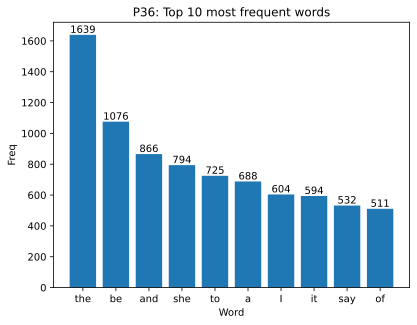

In [33]:
def p36() -> list[tuple[str, int]]:
    """
    >>> p36()
    [('the', 1522), ('and', 796), ('to', 721), ('a', 614), ('I', 544), ('it', 527), ('she', 509), ('of', 497), ('said', 456), ('Alice', 395)]
    """
    return p35().most_common(10)

p36_x_data, p36_y_data = zip(*p36())
plt.bar(p36_x_data, p36_y_data)

for idx, val in enumerate(p36_y_data):
    plt.text(idx, val, str(val), ha='center', va='bottom')

plt.title('P36: Top 10 most frequent words')
plt.xlabel("Word")
plt.ylabel("Freq")
plt.show()

In [34]:
# def p37():
#     for sentence in p30():
#         if "Alice".upper() in sentence['text'].str.upper().values:


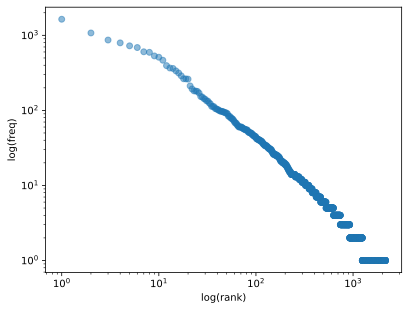

In [37]:
non_punct = set(punctuation) | set(
    [",", ".", ":", "$", "#", '"', "''", "``", "-LRB-", "-RRB-"]
)


def p39():
    stat: Counter[str] = Counter()
    for sentence in p30():
        stat += Counter(sentence[~sentence["pos"].isin(non_punct)]["lemma"])
    yield from stat.most_common()


p39_y_data = list(freq for name, freq in p39())
p39_x_data = list(x+1 for x in range(len(p39_y_data)))
plt.scatter(p39_x_data, p39_y_data, alpha=0.5)
# plt.plot(p39_x_data, p39_y_data, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(rank)')
plt.ylabel('log(freq)')
plt.show()